<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

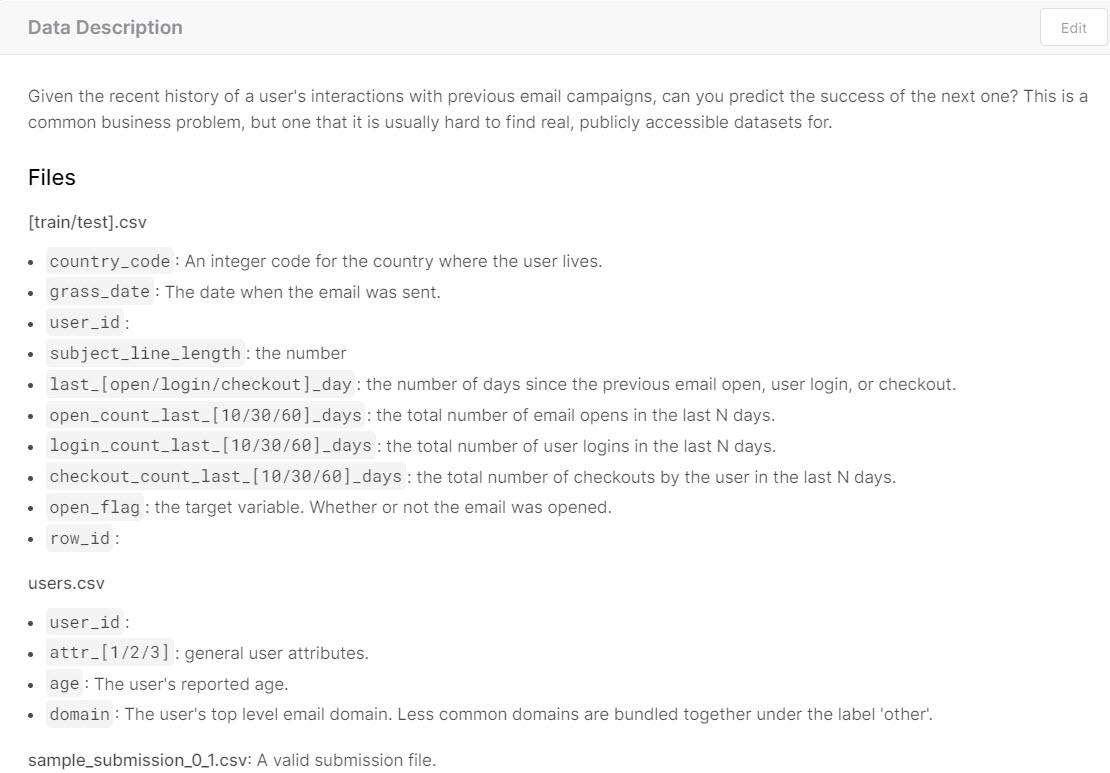

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [29]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

## Reading in the dataset

Reading User data

In [5]:
#Read the csv file 
dataset1_df = pd.read_csv('data/dataset1.csv')

In [6]:
dataset1_df

,attr_1,attr_2,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,1.0,1.0,2.0,33.0,64,59,1,3,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1.0,1.0,36.0,50,40,9,253,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,43.0,35,2,1,2,1,3,...,1,0,0,0,0,0,0,1,0,0
3,1.0,1.0,2.0,32.0,43,11,3,14,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1.0,4.0,36.0,37,12,9,20,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76131,1.0,1.0,4.0,0.0,52,3,2,5,0,0,...,0,0,0,1,0,0,0,0,0,0
76132,1.0,1.0,1.0,46.0,37,1,28,133,11,22,...,1,0,0,0,0,0,0,0,1,0
76133,1.0,1.0,1.0,46.0,37,1,28,133,11,22,...,1,0,0,0,0,0,0,0,1,0
76134,1.0,1.0,1.0,46.0,37,1,28,133,11,22,...,1,0,0,0,0,0,0,0,1,0


In [7]:
dataset1_df.shape

(76136, 37)

In [8]:
dataset1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76136 entries, 0 to 76135
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attr_1                       76136 non-null  float64
 1   attr_2                       76136 non-null  float64
 2   attr_3                       76136 non-null  float64
 3   age                          76136 non-null  float64
 4   subject_line_length          76136 non-null  int64  
 5   last_open_day                76136 non-null  int64  
 6   last_login_day               76136 non-null  int64  
 7   last_checkout_day            76136 non-null  int64  
 8   open_count_last_10_days      76136 non-null  int64  
 9   open_count_last_30_days      76136 non-null  int64  
 10  open_count_last_60_days      76136 non-null  int64  
 11  login_count_last_10_days     76136 non-null  int64  
 12  login_count_last_30_days     76136 non-null  int64  
 13  login_count_last

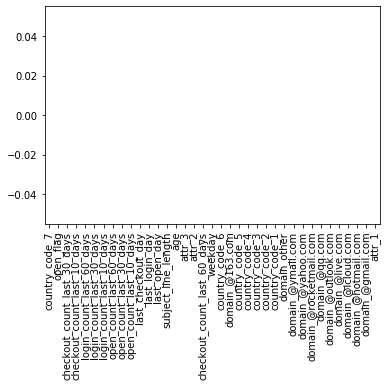

In [9]:
dataset1_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Train-test split dataset

reading trainng data

In [10]:
X = dataset1_df.drop(['open_flag'], axis=1)
y = dataset1_df['open_flag']

In [11]:
X.shape

(76136, 36)

In [12]:
y.shape

(76136,)

In [55]:
features = list(X)
features

['attr_1',
 'attr_2',
 'attr_3',
 'age',
 'subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'weekday',
 'domain_@163.com',
 'domain_@gmail.com',
 'domain_@hotmail.com',
 'domain_@icloud.com',
 'domain_@live.com',
 'domain_@outlook.com',
 'domain_@qq.com',
 'domain_@rocketmail.com',
 'domain_@yahoo.com',
 'domain_@ymail.com',
 'domain_other',
 'country_code_1',
 'country_code_2',
 'country_code_3',
 'country_code_4',
 'country_code_5',
 'country_code_6',
 'country_code_7']

In [39]:
len(features)

36

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [14]:
X_train.shape

(61669, 36)

In [15]:
X_train.columns

Index(['attr_1', 'attr_2', 'attr_3', 'age', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'weekday', 'domain_@163.com',
       'domain_@gmail.com', 'domain_@hotmail.com', 'domain_@icloud.com',
       'domain_@live.com', 'domain_@outlook.com', 'domain_@qq.com',
       'domain_@rocketmail.com', 'domain_@yahoo.com', 'domain_@ymail.com',
       'domain_other', 'country_code_1', 'country_code_2', 'country_code_3',
       'country_code_4', 'country_code_5', 'country_code_6', 'country_code_7'],
      dtype='object')

In [16]:
X_val.shape

(6853, 36)

In [17]:
X_test.shape

(7614, 36)

#### Check for Co-relation

In [18]:
# correlation matrix (before stdze)
corr = X_train.corr()
print('Corelation Matrix:\n',X_train.corr())

Corelation Matrix:
                                attr_1    attr_2    attr_3       age  \
attr_1                       1.000000 -0.001336  0.022670  0.003627   
attr_2                      -0.001336  1.000000 -0.014668 -0.031783   
attr_3                       0.022670 -0.014668  1.000000 -0.034675   
age                          0.003627 -0.031783 -0.034675  1.000000   
subject_line_length         -0.004392  0.051504 -0.009703 -0.055798   
last_open_day                0.006722 -0.132098  0.020420 -0.069376   
last_login_day              -0.031543 -0.007504 -0.022089  0.002534   
last_checkout_day           -0.071239 -0.010076 -0.006696 -0.009196   
open_count_last_10_days     -0.016516  0.039300 -0.045690  0.074419   
open_count_last_30_days     -0.012886  0.042443 -0.044624  0.091900   
open_count_last_60_days     -0.023184  0.042528 -0.041872  0.092584   
login_count_last_10_days     0.016490  0.017456  0.044730  0.045794   
login_count_last_30_days     0.017784  0.014321  0.048308

In [19]:
corr.to_csv('data/X_train_correlation.csv')

### Apply standardscalar 

In [20]:
X_train.shape

(61669, 36)

In [21]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.to_frame().columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.to_frame().columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.to_frame().columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_val_scaled = pd.DataFrame(X_val_scaled)
#X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.externals import joblib
scaler_filename = "dataset1_scaler.save"
joblib.dump(scaler, scaler_filename) 

['dataset1_scaler.save']

In [22]:
X_train_scaled

array([[ 0.02242625,  0.05956125,  0.36890262, ..., -0.31652945,
        -0.1900603 , -0.17829485],
       [ 0.02242625,  0.05956125, -0.96775164, ..., -0.31652945,
        -0.1900603 , -0.17829485],
       [ 0.02242625,  0.05956125,  0.36890262, ..., -0.31652945,
        -0.1900603 , -0.17829485],
       ...,
       [ 0.02242625,  0.05956125,  0.36890262, ..., -0.31652945,
        -0.1900603 , -0.17829485],
       [ 0.02242625,  0.05956125,  0.36890262, ..., -0.31652945,
        -0.1900603 , -0.17829485],
       [ 0.02242625,  0.05956125, -0.96775164, ..., -0.31652945,
        -0.1900603 , -0.17829485]])

In [24]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_val_scaled_df = pd.DataFrame(X_val_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [25]:
X_train_scaled_df.columns = X_train_col_names
X_val_scaled_df.columns = X_train_col_names 
X_test_scaled_df.columns = X_train_col_names

X_val_scaled_df.head()

,attr_1,attr_2,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0.022426,0.059561,-0.967752,1.586575,-0.805564,-0.340085,-0.224207,-0.411012,2.093230,3.278354,...,-0.280123,-0.056898,-0.138641,-0.720687,-0.512669,2.255873,-0.384948,-0.316529,-0.19006,-0.178295
1,0.022426,0.059561,-0.967752,1.353298,-1.339272,0.212224,-0.243080,3.176585,-0.333324,-0.645640,...,-0.280123,-0.056898,-0.138641,-0.720687,-0.512669,-0.443287,-0.384948,3.159264,-0.19006,-0.178295
2,0.022426,0.059561,0.368903,-0.590671,1.507170,-0.227897,-0.073220,-0.349901,-0.737749,-0.331721,...,-0.280123,-0.056898,-0.138641,-0.720687,1.950578,-0.443287,-0.384948,-0.316529,-0.19006,-0.178295
3,0.022426,0.059561,-0.967752,0.031399,-1.339272,-0.063931,-0.205333,-0.405620,-0.333324,-0.488680,...,3.569864,-0.056898,-0.138641,-0.720687,-0.512669,-0.443287,-0.384948,3.159264,-0.19006,-0.178295
4,0.022426,0.059561,0.368903,-0.668430,-0.894515,-0.292621,-0.129840,-0.065913,-0.737749,-0.331721,...,-0.280123,-0.056898,-0.138641,1.387565,-0.512669,-0.443287,-0.384948,-0.316529,-0.19006,-0.178295


In [26]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_train_scaled.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_val_scaled.xlsx', engine='xlsxwriter')

X_val_scaled_df.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [28]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_test_scaled.xlsx', engine='xlsxwriter')

X_test_scaled_df.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [30]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

In [31]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([1.])

In [32]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [45]:
#  Applying LDA
lda = LDA(n_components=4)
X_train_PDA = lda.fit(X_train_scaled, y_train)

In [46]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.50132157 0.49867843]


In [47]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)])
print("LDA Loadings:\n",scalings)

LDA Loadings:
                        features         0
0                        attr_1 -0.013353
1                        attr_2  0.012678
2                        attr_3 -0.059342
3                           age  0.043134
4           subject_line_length -0.033628
5                 last_open_day -0.035087
6                last_login_day  0.003684
7             last_checkout_day  0.031965
8       open_count_last_10_days  0.651437
9       open_count_last_30_days  0.281775
10      open_count_last_60_days  0.205555
11     login_count_last_10_days  0.144969
12     login_count_last_30_days -0.078011
13     login_count_last_60_days -0.081262
14  checkout_count_last_10_days -0.030434
15  checkout_count_last_30_days  0.068710
16  checkout_count_last_60_days -0.037320
17                      weekday -0.087008
18              domain_@163.com  0.007874
19            domain_@gmail.com -0.005910
20          domain_@hotmail.com -0.031109
21           domain_@icloud.com  0.012167
22             doma

In [48]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('data/LDA_Loadings.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [49]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)])
print("\nLDA Coefficients:\n",coeff)


LDA Coefficients:
                        features         0
0                        attr_1 -0.020025
1                        attr_2  0.019012
2                        attr_3 -0.088989
3                           age  0.064685
4           subject_line_length -0.050429
5                 last_open_day -0.052617
6                last_login_day  0.005525
7             last_checkout_day  0.047934
8       open_count_last_10_days  0.976901
9       open_count_last_30_days  0.422553
10      open_count_last_60_days  0.308252
11     login_count_last_10_days  0.217397
12     login_count_last_30_days -0.116986
13     login_count_last_60_days -0.121861
14  checkout_count_last_10_days -0.045638
15  checkout_count_last_30_days  0.103038
16  checkout_count_last_60_days -0.055965
17                      weekday -0.130479
18              domain_@163.com  0.011809
19            domain_@gmail.com -0.008862
20          domain_@hotmail.com -0.046651
21           domain_@icloud.com  0.018245
22            

In [50]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([3898, 3716], dtype=int64))

Confusion Matrix:
 [[2526 1372]
 [1251 2465]]


              precision    recall  f1-score   support

           0      0.648     0.669     0.658      3777
           1      0.663     0.642     0.653      3837

    accuracy                          0.656      7614
   macro avg      0.656     0.656     0.655      7614
weighted avg      0.656     0.656     0.655      7614



### Applying PCA

In [56]:
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [58]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.106502,0.659290,0.226740,-0.461997,-0.429678,1.490696,-0.001520,-0.388022,-0.696199,0.311338,...,2.230368,-0.296407,0.287894,-1.025510,-0.283260,0.089434,-0.028437,-0.133036,-1.537815e-16,3.626938e-16
1,-1.226027,-0.806958,-0.784445,-0.002551,0.029721,-0.356347,0.719495,-1.288676,-0.167276,0.976016,...,0.304348,1.328711,-0.059699,-0.469380,-0.020725,-0.093401,0.007489,0.043444,-2.925594e-16,5.738246e-17
2,-0.843513,-0.114554,0.969122,-0.072685,-1.146866,1.647928,0.494634,-0.806746,0.122403,-0.943889,...,1.762477,0.434251,0.068846,-0.428649,-0.119260,-0.235177,-0.019336,0.159080,-2.648038e-16,1.406492e-16
3,-1.781444,0.091816,1.120724,1.106719,3.768722,-2.135635,-0.136184,0.209964,2.209043,0.961641,...,0.408749,-1.298220,-0.010048,-0.015038,-0.032914,0.004873,0.029613,0.002586,1.515298e-16,5.014717e-16
4,-0.985757,0.327692,-0.358834,-0.050736,-0.511072,0.159689,1.103205,1.281908,-0.449261,-1.688994,...,-0.507749,-0.330606,0.049963,-0.329895,-0.150365,0.129503,-0.155309,-0.100466,9.601865e-17,-3.311956e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61664,-1.324803,-0.459639,-0.176884,0.311173,-1.036707,-0.189899,1.351384,1.151068,-0.737265,-0.657303,...,0.006273,0.460403,0.129043,0.015527,-0.014832,-0.082328,-0.052553,0.009578,-1.260260e-16,-5.363984e-17
61665,-1.406145,-0.202966,0.586988,0.133520,0.305864,1.768502,0.423337,0.238045,-0.214658,0.525067,...,1.763373,-1.025771,0.007492,-0.225710,-0.184238,0.040618,-0.119277,-0.047266,-3.758261e-16,1.406492e-16
61666,1.036400,-0.859203,1.569594,-1.378607,2.294434,-2.558988,-0.593151,-0.356721,-0.264560,0.179461,...,0.454575,0.065258,-0.321526,-0.201075,0.664325,-0.207443,0.052193,0.322286,3.735744e-16,7.235163e-16
61667,-1.456392,-0.760221,-0.201812,0.211477,-1.047198,-0.321001,1.285629,1.265005,-0.984062,-0.280499,...,0.195954,0.505792,0.004452,-0.173473,0.019866,-0.067917,-0.022220,0.020590,-1.815371e-16,1.871313e-18


In [59]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,4.009499e+00
PC2,3.090634e+00
PC3,2.206083e+00
PC4,1.834377e+00
PC5,1.617712e+00
PC6,1.501964e+00
PC7,1.308475e+00
PC8,1.227259e+00
PC9,1.135513e+00
PC10,1.107104e+00


In [60]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,0.106502,0.659290,0.226740,-0.461997,-0.429678,1.490696,-0.001520,-0.388022,-0.696199,0.311338,...,2.230368,-0.296407,0.287894,-1.025510,-0.283260,0.089434,-0.028437,-0.133036,-1.537815e-16,3.626938e-16
1,-1.226027,-0.806958,-0.784445,-0.002551,0.029721,-0.356347,0.719495,-1.288676,-0.167276,0.976016,...,0.304348,1.328711,-0.059699,-0.469380,-0.020725,-0.093401,0.007489,0.043444,-2.925594e-16,5.738246e-17
2,-0.843513,-0.114554,0.969122,-0.072685,-1.146866,1.647928,0.494634,-0.806746,0.122403,-0.943889,...,1.762477,0.434251,0.068846,-0.428649,-0.119260,-0.235177,-0.019336,0.159080,-2.648038e-16,1.406492e-16
3,-1.781444,0.091816,1.120724,1.106719,3.768722,-2.135635,-0.136184,0.209964,2.209043,0.961641,...,0.408749,-1.298220,-0.010048,-0.015038,-0.032914,0.004873,0.029613,0.002586,1.515298e-16,5.014717e-16
4,-0.985757,0.327692,-0.358834,-0.050736,-0.511072,0.159689,1.103205,1.281908,-0.449261,-1.688994,...,-0.507749,-0.330606,0.049963,-0.329895,-0.150365,0.129503,-0.155309,-0.100466,9.601865e-17,-3.311956e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61664,-1.324803,-0.459639,-0.176884,0.311173,-1.036707,-0.189899,1.351384,1.151068,-0.737265,-0.657303,...,0.006273,0.460403,0.129043,0.015527,-0.014832,-0.082328,-0.052553,0.009578,-1.260260e-16,-5.363984e-17
61665,-1.406145,-0.202966,0.586988,0.133520,0.305864,1.768502,0.423337,0.238045,-0.214658,0.525067,...,1.763373,-1.025771,0.007492,-0.225710,-0.184238,0.040618,-0.119277,-0.047266,-3.758261e-16,1.406492e-16
61666,1.036400,-0.859203,1.569594,-1.378607,2.294434,-2.558988,-0.593151,-0.356721,-0.264560,0.179461,...,0.454575,0.065258,-0.321526,-0.201075,0.664325,-0.207443,0.052193,0.322286,3.735744e-16,7.235163e-16
61667,-1.456392,-0.760221,-0.201812,0.211477,-1.047198,-0.321001,1.285629,1.265005,-0.984062,-0.280499,...,0.195954,0.505792,0.004452,-0.173473,0.019866,-0.067917,-0.022220,0.020590,-1.815371e-16,1.871313e-18


In [61]:
pca

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=features),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=features)

Loading Matrix:
                                  PC1       PC2       PC3       PC4       PC5  \
attr_1                       0.026846 -0.027703  0.000647 -0.032055 -0.067156   
attr_2                       0.027404  0.050389 -0.200844  0.003567  0.049629   
attr_3                       0.025136 -0.064694  0.040518 -0.100096 -0.081166   
age                          0.097519  0.184588  0.362319 -0.050457  0.017611   
subject_line_length          0.002183 -0.110990 -0.301719  0.108690  0.671254   
last_open_day               -0.124429 -0.335929  0.073431  0.120099 -0.047451   
last_login_day              -0.218814  0.015107  0.004347  0.164587  0.082256   
last_checkout_day           -0.309487 -0.016704 -0.043989  0.147430  0.183227   
open_count_last_10_days      0.130552  0.882873 -0.203791 -0.010170  0.047955   
open_count_last_30_days      0.129209  0.933588 -0.205929 -0.002831  0.042664   
open_count_last_60_days      0.132448  0.915183 -0.203410 -0.006532  0.037185   
login_count_

In [63]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=features),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=features)


Eigenvectors (Linear Coefficients):
                                  PC1       PC2       PC3       PC4       PC5  \
attr_1                       0.013407 -0.015758  0.000436 -0.023667 -0.052800   
attr_2                       0.013686  0.028662 -0.135222  0.002634  0.039020   
attr_3                       0.012553 -0.036799  0.027279 -0.073905 -0.063815   
age                          0.048702  0.104998  0.243938 -0.037255  0.013846   
subject_line_length          0.001090 -0.063134 -0.203138  0.080250  0.527760   
last_open_day               -0.062141 -0.191084  0.049439  0.088673 -0.037308   
last_login_day              -0.109277  0.008593  0.002927  0.121521  0.064672   
last_checkout_day           -0.154560 -0.009502 -0.029616  0.108853  0.144058   
open_count_last_10_days      0.065199  0.502197 -0.137206 -0.007509  0.037704   
open_count_last_30_days      0.064528  0.531045 -0.138646 -0.002090  0.033544   
open_count_last_60_days      0.066145  0.520576 -0.136950 -0.004823  0.0

In [65]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 20 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [4.00949856 3.09063424 2.20608331 1.83437736 1.61771215 1.50196369
 1.3084745  1.22725866 1.13551288 1.10710409 1.06294162 1.04704392
 1.0370565  1.01846049 1.00437325 1.00244549 0.99685498 0.99230824
 0.97772019 0.96910444]
%Explained_Var: [11.13731541  8.58495589  6.12790982  5.09541005  4.49357201  4.17205371
  3.63459246  3.40899657  3.15415129  3.07523926  2.95256774  2.90840817
  2.88066579  2.82901103  2.78988046  2.78452564  2.7689967   2.75636708
  2.71584537  2.69191312]
%Cumulative   : [11.13731541 19.7222713  25.85018112 30.94559117 35.43916318 39.61121688
 43.24580934 46.65480591 49.8089572  52.88419646 55.8367642  58.74517237
 61.62583816 64.45484919 67.24472965 70.02925529 72.798252   75.55461907
 78.27046444 80.96237756]




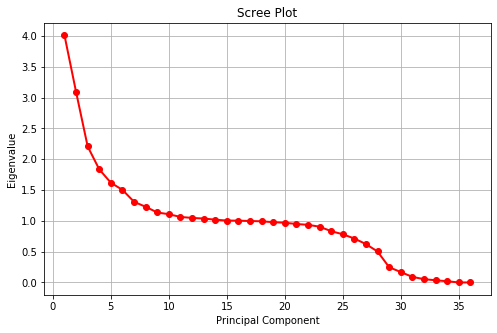

In [66]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [67]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.11373154e-01, 8.58495589e-02, 6.12790982e-02, 5.09541005e-02,
       4.49357201e-02, 4.17205371e-02, 3.63459246e-02, 3.40899657e-02,
       3.15415129e-02, 3.07523926e-02, 2.95256774e-02, 2.90840817e-02,
       2.88066579e-02, 2.82901103e-02, 2.78988046e-02, 2.78452564e-02,
       2.76899670e-02, 2.75636708e-02, 2.71584537e-02, 2.69191312e-02,
       2.63354699e-02, 2.59744814e-02, 2.51313798e-02, 2.31061117e-02,
       2.17229499e-02, 1.97897436e-02, 1.72848171e-02, 1.39490004e-02,
       6.86897857e-03, 4.68305664e-03, 2.51642851e-03, 1.48052798e-03,
       9.87016172e-04, 5.46262819e-04, 2.19644818e-32, 2.95750783e-33])

<h3>Save all PCA and LDA Results to excel file<h3>

In [68]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Loadings.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [69]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_EigenVectors.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [70]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Data.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()